In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
sns.set_palette("icefire")
pd.set_option('display.max_columns', 500)

# Load Data

In [2]:
patient = joblib.load("patient.pkl")

In [3]:
print(patient.shape)
patient.tail()

(558211, 56)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,IsOutpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaT,NaN,0.0,NaT,NaN,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1952-04-01,NaT,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaT,NaN,0.0,NaT,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1952-04-01,NaT,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaT,NaN,0.0,NaT,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1952-04-01,NaT,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaT,NaN,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1952-04-01,NaT,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No
558210,BENE159198,CLM686139,2009-11-17,2009-11-18,PRV53689,80,PHY419379,NaN,PHY419379,NaT,NaN,0.0,NaT,NaN,78900,78609,4280,71946,3310,75311,2724,V103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1952-04-01,NaT,2,1,0,21,20,12,12,1,1,2,2,2,1,1,2,2,1,2,0,0,5470,1870,No


# EDA

## Q. How many claims did each provider make?


In [4]:
num_clm = patient.groupby(['PotentialFraud','IsOutpatient','Provider'])[['ClaimID']].size()
num_clm = pd.DataFrame(num_clm, columns = ["Count"]).reset_index().set_index("Provider")
num_clm

,PotentialFraud,IsOutpatient,Count
Provider,,,
PRV51001,No,0,5
PRV51007,No,0,3
PRV51008,No,0,2
PRV51011,No,0,1
PRV51023,No,0,9
...,...,...,...
PRV57569,Yes,1,68
PRV57642,Yes,1,197
PRV57672,Yes,1,425


Text(0.5, 1.0, 'Number of Outpatient Claims Made by Providers')

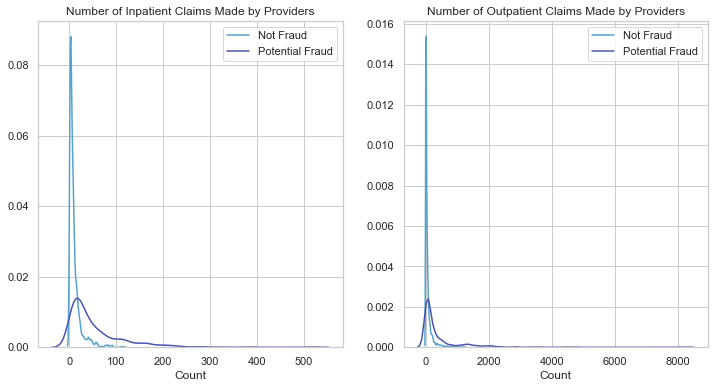

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(num_clm.loc[(num_clm['IsOutpatient'] == 0) & (num_clm['PotentialFraud'] == "No"),
                         "Count"], hist = False, label = "Not Fraud", ax = ax[0]);
sns.distplot(num_clm.loc[(num_clm['IsOutpatient'] == 0) & (num_clm['PotentialFraud'] == "Yes"),
                         "Count"], hist = False, label = "Potential Fraud", ax = ax[0]);
sns.distplot(num_clm.loc[(num_clm['IsOutpatient'] == 1) & (num_clm['PotentialFraud'] == "No"),
                         "Count"], hist = False, label = "Not Fraud", ax = ax[1]);
sns.distplot(num_clm.loc[(num_clm['IsOutpatient'] == 1) & (num_clm['PotentialFraud'] == "Yes"),
                         "Count"], hist = False, label = "Potential Fraud", ax = ax[1]);
ax[0].set_title("Number of Inpatient Claims Made by Providers")
ax[1].set_title("Number of Outpatient Claims Made by Providers")

## Q. How many days does it take for claims to end in average for providers?


In [6]:
patient["ClaimDuration"] = patient["ClaimEndDt"] - patient["ClaimStartDt"]
patient["ClaimDuration"] = patient["ClaimDuration"].dt.days

In [7]:
clm_dur = patient[['PotentialFraud','IsOutpatient', 'ClaimDuration']]
clm_dur

,PotentialFraud,IsOutpatient,ClaimDuration
0,Yes,0,6
1,No,0,2
2,No,0,3
3,No,0,8
4,No,0,17
...,...,...,...
558206,No,1,0
558207,No,1,0
558208,No,1,0
558209,No,1,0


Text(0.5, 1.0, 'Claim Duration for Outpatients')

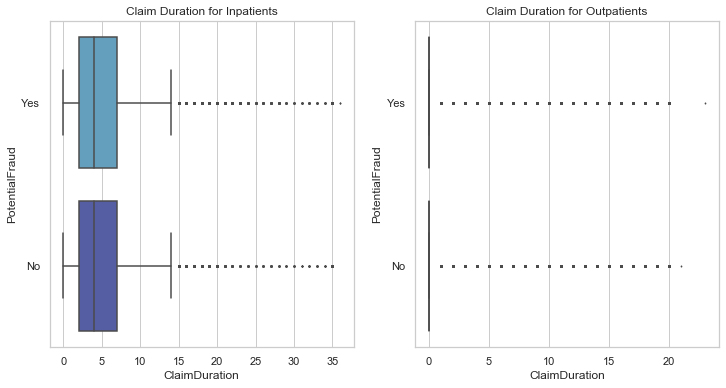

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = clm_dur[clm_dur['IsOutpatient'] == 0], 
            x = "ClaimDuration", y = 'PotentialFraud', ax = ax[0], fliersize= 1);
sns.boxplot(data = clm_dur[clm_dur['IsOutpatient'] == 1], 
            x = "ClaimDuration", y = 'PotentialFraud', ax = ax[1], fliersize= 1);
ax[0].set_title("Claim Duration for Inpatients")
ax[1].set_title("Claim Duration for Outpatients")
# Why are there Outpatients that takes more than 1 day to claim?

In [9]:
clm_dur = patient.groupby(['PotentialFraud','IsOutpatient','Provider'])[["ClaimDuration"]].mean()
clm_dur = pd.DataFrame(clm_dur).reset_index()
clm_dur.columns.values[3] = 'MeanClmDuration'
clm_dur

,PotentialFraud,IsOutpatient,Provider,MeanClmDuration
0,No,0,PRV51001,5.000000
1,No,0,PRV51007,5.333333
2,No,0,PRV51008,4.000000
3,No,0,PRV51011,5.000000
4,No,0,PRV51023,3.555556
...,...,...,...,...
7099,Yes,1,PRV57569,2.647059
7100,Yes,1,PRV57642,0.949239
7101,Yes,1,PRV57672,1.242353
7102,Yes,1,PRV57697,1.166667


Text(0.5, 1.0, 'Mean Claim Duration for Outpatients by Providers')

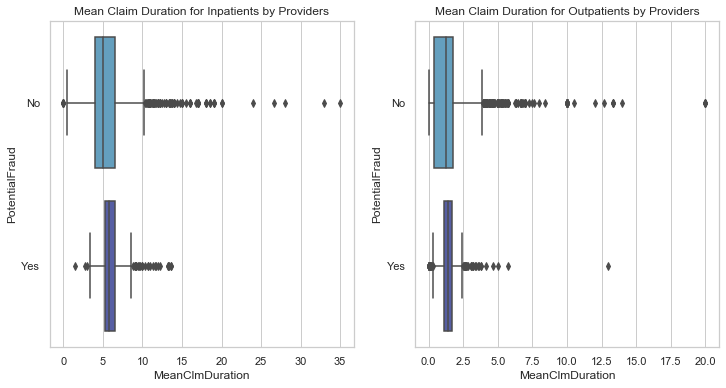

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = clm_dur[(clm_dur['IsOutpatient'] == 0)], 
            x = "MeanClmDuration", y = 'PotentialFraud', ax = ax[0]);
sns.boxplot(data = clm_dur[(clm_dur['IsOutpatient'] == 1)], 
            x = "MeanClmDuration", y = 'PotentialFraud', ax = ax[1]);
ax[0].set_title("Mean Claim Duration for Inpatients by Providers")
ax[1].set_title("Mean Claim Duration for Outpatients by Providers")
# So when we mean by the providers the distinct patterns can be noticed

## Q. What is the total/mean/median amount of reimbursed claims for each provider?

In [11]:
avg_reimb = patient.groupby(['PotentialFraud','IsOutpatient','Provider'])\
            [["InscClaimAmtReimbursed"]].agg(['sum','mean','median'])
avg_reimb.columns = avg_reimb.columns.get_level_values(0)
avg_reimb.columns.values[0] = 'TotalAmtReimbursed'
avg_reimb.columns.values[1] = 'MeanAmtReimbursed'
avg_reimb.columns.values[2] = 'MedianAmtReimbursed'
avg_reimb= avg_reimb.reset_index()
avg_reimb

,PotentialFraud,IsOutpatient,Provider,TotalAmtReimbursed,MeanAmtReimbursed,MedianAmtReimbursed
0,No,0,PRV51001,97000,19400.000000,12000
1,No,0,PRV51007,19000,6333.333333,6000
2,No,0,PRV51008,25000,12500.000000,12500
3,No,0,PRV51011,5000,5000.000000,5000
4,No,0,PRV51023,54000,6000.000000,4000
...,...,...,...,...,...,...
7099,Yes,1,PRV57569,26940,396.176471,85
7100,Yes,1,PRV57642,33470,169.898477,70
7101,Yes,1,PRV57672,118190,278.094118,80
7102,Yes,1,PRV57697,4650,258.333333,65


Text(0.5, 1.0, 'Total Amount of Reimbursed Claims for Outpatients by Providers ($)')

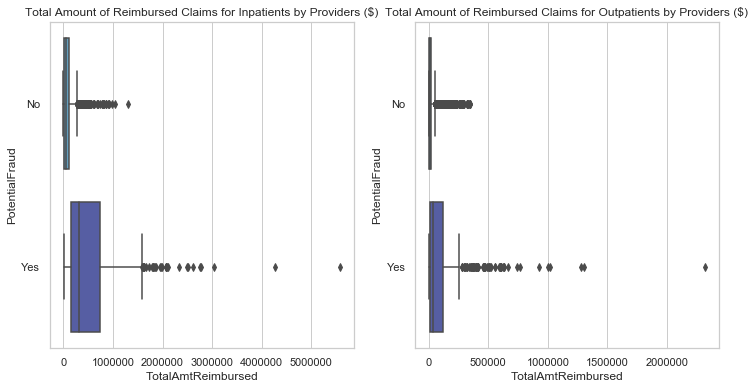

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 0)], 
            x = "TotalAmtReimbursed", y = 'PotentialFraud', ax = ax[0]);
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 1)], 
            x = "TotalAmtReimbursed", y = 'PotentialFraud', ax = ax[1]);
ax[0].set_title("Total Amount of Reimbursed Claims for Inpatients by Providers ($)")
ax[1].set_title("Total Amount of Reimbursed Claims for Outpatients by Providers ($)")

Text(0.5, 1.0, 'Mean Amount of Reimbursed Claims for Outpatients by Providers ($)')

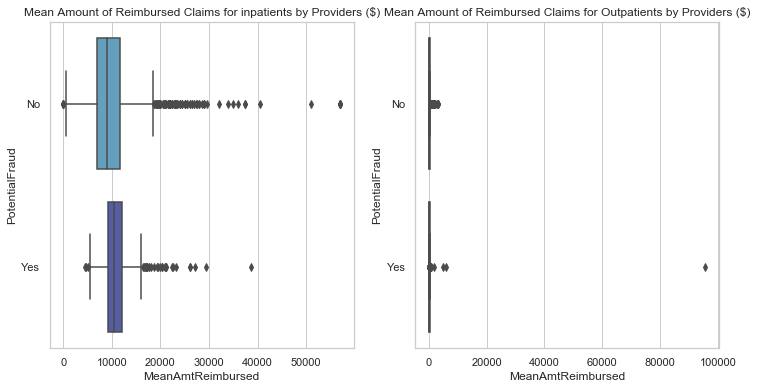

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 0)], 
            x = "MeanAmtReimbursed", y = 'PotentialFraud', ax = ax[0]);
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 1)], 
            x = "MeanAmtReimbursed", y = 'PotentialFraud', ax = ax[1]);
ax[0].set_title("Mean Amount of Reimbursed Claims for inpatients by Providers ($)")
ax[1].set_title("Mean Amount of Reimbursed Claims for Outpatients by Providers ($)")

Text(0.5, 1.0, 'Median Amount of Reimbursed Claims for Outpatients by Providers ($)')

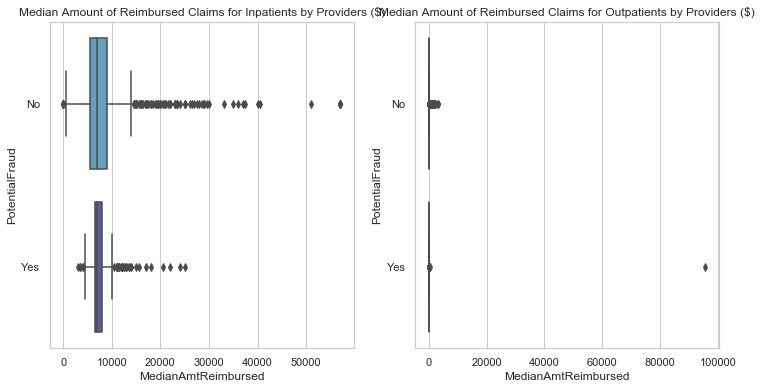

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 0)], 
            x = "MedianAmtReimbursed", y = 'PotentialFraud', ax = ax[0]);
sns.boxplot(data = avg_reimb[(avg_reimb['IsOutpatient'] == 1)], 
            x = "MedianAmtReimbursed", y = 'PotentialFraud', ax = ax[1]);
ax[0].set_title("Median Amount of Reimbursed Claims for Inpatients by Providers ($)")
ax[1].set_title("Median Amount of Reimbursed Claims for Outpatients by Providers ($)")

## Missing Values

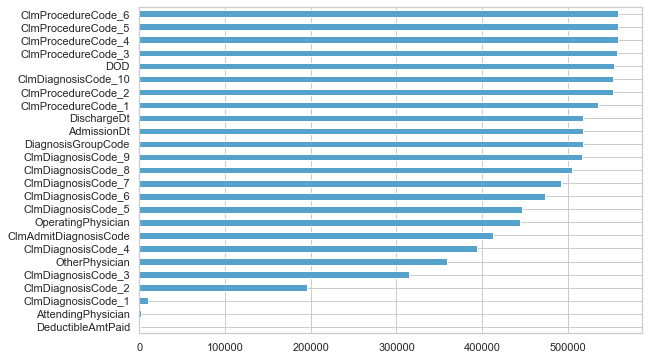

In [15]:
missing = pd.DataFrame(patient.isna().sum().sort_values(), columns = ["Count_NaN"])
missing[missing["Count_NaN"] > 0].plot(kind= 'barh',legend = None);